# E-tivity 2 (12/02/24 - 25/02/24)

* Name: Paul Trayers

* Student ID: 8907021

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the grades for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: Complete with suitable preprocessing steps. There is no unique solution but you should justify the actions you are taking.

**Task 2 [0-4]**: Complete with suitable treatment of missing values. Again there maybe more than one solution, the important thing is to justify your actions.

**Tasks 3+4 [0-4]**: Create a suitable model with correct evaluation. Test for common DL issues.

**Task 5 [0-6]**: Completion of Task 5, using the layers outlined. The purpose of the task is to demonstrate that you can construct a valid model from scratch. Direct copy and paste from the web is not acceptable.

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables.


### Tasks 1-4 (complete by Sunday 18/02/24)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

# Load Dataset

Load dataset from Google Drive.

In [4]:
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/cs5004/Etivities/Etivity2/
!ls -ail ./data/stock.csv

Mounted at /content/drive
/content/drive/MyDrive/cs5004/Etivities/Etivity2
236 -rw------- 1 root root 53284 Feb 14 00:13 ./data/stock.csv


In [5]:
import pandas as pd

# Specify the path to your CSV file
file_path = './data/stock.csv'

# Load the dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

pd.set_option('display.max_rows', 8)
df.head(10)

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
...,...,...,...,...,...
6,2015-12-02,2101.709961,41.689999,0.9458,1112.4
7,2015-12-03,2080.709961,40.150002,0.9173,1120.6
8,2015-12-04,2051.239990,41.310001,0.9188,1143.2
9,2015-12-07,2090.419922,40.099998,0.9225,1134.3


# **Task 1: Data Preprocessing**

Explain any preprocessing steps you take including but not limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


## 1.1 Explore Dataset (pre-split)

First we explore the data through some basic descriptive analytics and visualisation. This EDA precedes splitting the data but with an awareness that unseen data (test set) should not inform the training process. As such our focus here is on understanding past behaviors, seasonality and trends but without assuming future patterns will be the same.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

# Convert 'Date' column to datetime if it's not already.

# Setting the 'Date' column as the index of the DataFrame simplifies time-based operations - accessing specific time periods or resampling data
# is more intuitive and efficient and Pandas has several time series-specific methods that work best with a DatetimeIndex.
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame.
df.set_index('Date', inplace=True)

Show line plot for initial temporal view of the features over time.

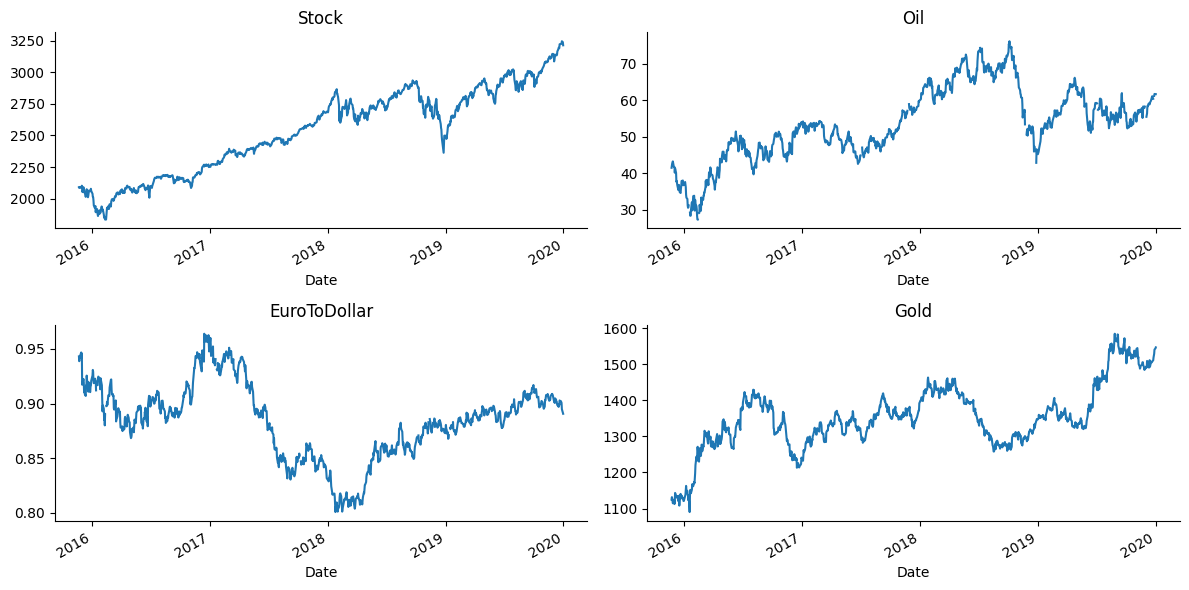

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define columns for which to create line plots, excluding 'Date'.
feature_cols = ['Stock', 'Oil', 'EuroToDollar', 'Gold']

# Determine the number of rows and columns for the subplot grid.
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))  # Create a subplot for each column in a 2x2 grid.
axes = axes.flatten()  # Flatten the axes array for easy iteration.

for i, column in enumerate(feature_cols):
    ax = axes[i]
    df[column].plot(kind='line', ax=ax, title=column)
    # Use DateFormatter to show year and abbreviated month on x-axis.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Use MonthLocator if you want to show every month as a major tick.
    ax.xaxis.set_major_locator(mdates.YearLocator())
    # Hide the top and right spines for each subplot.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()
plt.show()


Normalization is used here solely for the purpose of visual trend comparison over the whole dataset during his EDA phase. This is discarded before the data split on the original dataset to avoid any data leakage of information from the test data into the training dataset.

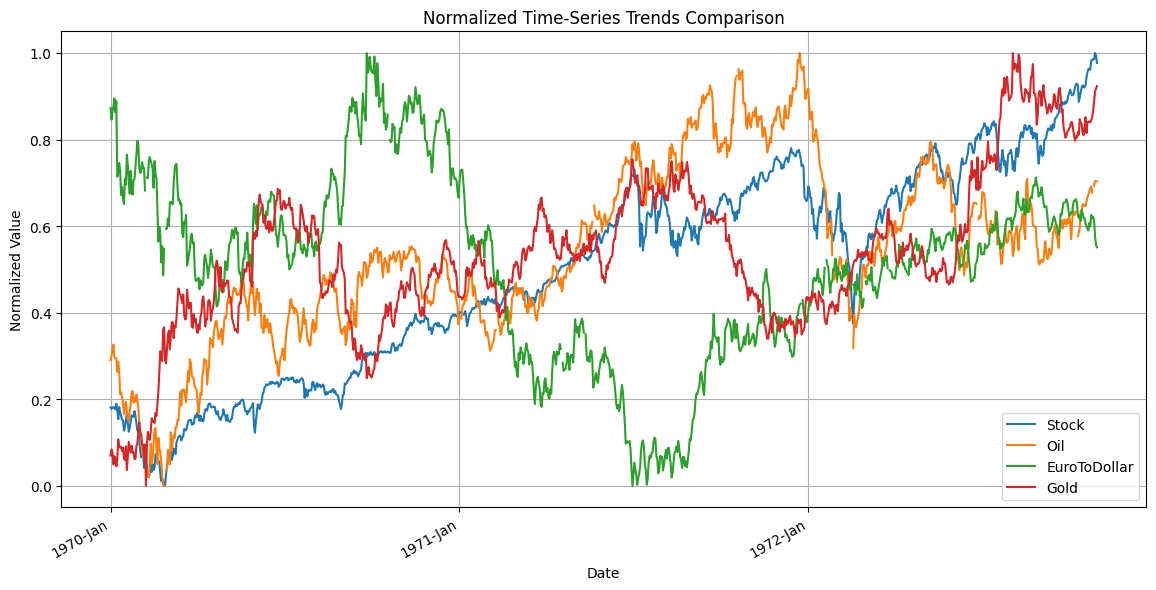

In [8]:
# Normalize the columns to be between 0 and 1
normalized_data = (data - data.min()) / (data.max() - data.min())

# Plotting
plt.figure(figsize=(14, 7))

# Plot each normalized time-series on the same plot
for column in feature_cols:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

# Formatting the plot
plt.title('Normalized Time-Series Trends Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)

# Setting major x-axis formatter to show year and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.show()


The normalized plot shows how Stock, Oil, EuroToDollar, and Gold have trended over time on a comparable scale. Observing, there are some periods where tassets move together and others where they diverge. Stock and oil price lines appear to move in tandem while gold prices appear to rise several places when stocks fall. The hope is that Deep learning model would uncover more intricate patterns at play in order to potentially predict future stock price based on the known trends of these other variables. A "many-to-one" deep learning model leverages the historical data from all these variables to forecast future stock market movement, ideally  capturing the complex interdependencies of market dynamics.

## 1.2 Split Training / Test Data

First we divide the original unaltered data into training and test sets in an 80/20 split. Any subsequent cleansing and preprocessing operations will be performed seperately on training and test sets to maintain consistency across the datasets while avoiding any potential data leakage into the training data from the test set.


In [9]:
# Calculate the split index
training_data_len = int(len(df) * 0.8)

# Splitting the data
n_features = 4  # include all 4 features
train_df = df.iloc[:training_data_len].iloc[:,:n_features]  # select n features from the dataset
test_df = df.iloc[training_data_len:].iloc[:,:n_features]

# Print first few rows of each to verify the split.
print("Training set:\n", train_df)
print("\nTest set:\n", test_df)
print("\nThere are "+ str(train_df.shape) + " samples in the training data")
print("There are "+ str(test_df.shape) + " samples in the test data")
# Output the split index and corresponding date for verification
print(f"Split index at {training_data_len} corresponding to the date: {df.index[training_data_len]}")


Training set:
                   Stock        Oil  EuroToDollar    Gold
Date                                                    
2015-11-23  2089.409912  41.490002        0.9432  1124.7
2015-11-24  2084.419922  42.040001        0.9388  1131.6
2015-11-25  2089.300049  42.689999        0.9420  1128.4
2015-11-27  2088.820068  43.250000        0.9438  1114.5
...                 ...        ...           ...     ...
2019-03-04  2814.370117  55.830002        0.8828  1346.3
2019-03-05  2794.409912  56.450001        0.8850  1343.5
2019-03-06  2790.270020  56.279999        0.8834  1346.5
2019-03-07  2766.530029  56.200001        0.8917  1344.9

[826 rows x 4 columns]

Test set:
                   Stock        Oil  EuroToDollar    Gold
Date                                                    
2019-03-08  2730.790039  56.430000        0.8894  1358.5
2019-03-11  2747.610107  56.070000        0.8908  1350.0
2019-03-12  2787.340088  56.759998        0.8868  1356.6
2019-03-13  2799.780029  57.090000   

* Handling missing values and imputation should be done before splitting the dataset ensure that any patterns or imputation logic are applied consistently across both datasets. Handling the missing values should mean  the test set better represents the real-world.

* Applying the same preprocessing steps, including missing data handling, ensures that the model is trained and validated on data that is processed in a consistent manner.

* Since where temporal alignment is critical in time series data, and missing data handling can involve using past or future data points to impute values, this needs to be done before the split to maintain the sequence integrity.

## 2.1 Missing Dates

### 2.1.1 Missing Dates - Identifying

We will first identify any missing Dates from our dataframe on the basis of generating the sequence of all valid working days (excluding weekends and U.S. public holidays) and compare this with the dates in our dataframe to identify missing dates. We will assume the Stock market is NYSE.

In [10]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Assuming your DataFrame 'df' has 'Date' as its datetime index

# Generate a date range for your dataset's period
start_date = df.index.min()
end_date = df.index.max()

# Adjust for specific market holidays (e.g., US Federal Holidays)
us_holidays = USFederalHolidayCalendar().holidays(start=start_date, end=end_date)
bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Generate the expected sequence of working days
business_days = pd.date_range(start_date, end_date, freq=bday_us)

# Convert the generated dates to a DatetimeIndex for comparison
business_days_index = pd.DatetimeIndex(business_days)

# Identify missing dates by finding dates in 'business_days_index' not in 'df.index'
missing_dates = business_days_index.difference(df.index)

print(f"Missing working days: {missing_dates}")


Missing working days: DatetimeIndex(['2016-03-25', '2017-04-14', '2018-03-30', '2018-12-05',
               '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


### 2.1.2 Missing Dates - Handling

Next we consider potential strategies for handling missing dates in the timeseries:

* Forward Fill or Backward Fill
Fill missing values with the last available value (forward fill) or next available value (backward fill), with forward fill preferred as it reflects the last known price.

* Linear Interpolation
Suitable for short gaps, assumes a linear price change which is rarely the case with stocks.

* Time Series Decomposition
Decomposing into trend, seasonal, and residual components, estimating missing values for each component separately. However, stock prices usually don't have seasonality.

* Mean/Median Imputation
Generally not recommended for stock prices as it doesn't reflect time-series nature.

* Use a Model to Predict Missing Values
More complex statistical models like ARIMA or LSTMs predict the missing values.

* Do Not Impute
May be able to tolerate missing data, if not many missing dates. Avoids introducing potential biases from imputation process.

We handle the missing data after the train-test split applying the same strategy independently to the training and test data to ensure consistency and ensuring the imputation strategy does not inadvertently introduce future information into the training process.

Choosing the first option, we will apply forward fill (propagate the last valid observation forward) and then backward fill (which fills in remaining NaN values by propagating the next valid observation backward).

We note that `train_df` and `test_df` have datetime indexes and we ensure that the imputation is performed after scaling (normalization) to maintain the correct data distribution.

In [11]:
# Impute missing dates in the training set
# Use forward fill to impute missing dates in both datasets executing independently for each dataset to prevent data leakage.
print("Missing dates in training set before imputation:", train_df.index.difference(business_days_index))
print("Missing dates in test set before imputation:", test_df.index.difference(business_days_index))
print("..")

# Approach - how it works:
# 1. Reindex train_df and test_df to the full sequence of expected business days (business_days_index), which will introduce NaN
#    values for the previously missing dates.
# 2. Apply forward fill to impute these missing values using the last available non-missing value.
# 3. Slice the reindexed DataFrame back to the original index range of train_df and test_df to ensure that no future data is included
#    in the train set and that the test set only contains data after the last date in the train set.

# Correct approach to identify missing dates directly
missing_train_dates = business_days_index.difference(train_df.index)
missing_test_dates = business_days_index.difference(test_df.index)

# The reindexing and forward fill steps remain correct:
train_df = train_df.reindex(business_days_index).ffill().loc[train_df.index.min():train_df.index.max()]
test_df = test_df.reindex(business_days_index).ffill().loc[test_df.index.min():test_df.index.max()]

# Verification after imputation should accurately reflect the absence of missing dates
print("Missing dates in training set after imputation:", train_df.index.difference(business_days_index))
print("Missing dates in test set after imputation:", test_df.index.difference(business_days_index))

Missing dates in training set before imputation: DatetimeIndex(['2016-01-18', '2016-02-15', '2017-10-09', '2017-11-10',
               '2018-10-08', '2018-11-12'],
              dtype='datetime64[ns]', freq=None)
Missing dates in test set before imputation: DatetimeIndex(['2019-10-14', '2019-11-11'], dtype='datetime64[ns]', freq=None)
..
Missing dates in training set after imputation: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Missing dates in test set after imputation: DatetimeIndex([], dtype='datetime64[ns]', freq=None)


## 2.2 Missing Values (excluding Date)

In [12]:
# Show rows with any NaNs or nulls in train_df
rows_with_nans = train_df[train_df.isnull().any(axis=1)]
print(rows_with_nans)
rows_with_nans = test_df[test_df.isnull().any(axis=1)]
print(rows_with_nans)

Empty DataFrame
Columns: [Stock, Oil, EuroToDollar, Gold]
Index: []
Empty DataFrame
Columns: [Stock, Oil, EuroToDollar, Gold]
Index: []


In [13]:
# Check for missing values before handling
print("Missing values before handling (pre-imputation):")
print("Training set:\n", train_df.isnull().sum())
print("Testing set:\n", test_df.isnull().sum())

# Handling missing values using forward fill (propagate last valid observation forward)
train_df.ffill(inplace=True)
test_df.ffill(inplace=True)  # Use forward fill first to ensure consistency in data handling

# If forward fill was not sufficient (e.g., if the first values are missing), then use backward fill
train_df.bfill(inplace=True)
test_df.bfill(inplace=True)  # Now correctly apply backward fill once to handle potentially unfilled values at the beginning

# Verify the imputation by checking for missing values after handling
print("\nMissing values after handling (post-imputation):")
print("Training set:\n", train_df.isnull().sum())
print("Testing set:\n", test_df.isnull().sum())

Missing values before handling (pre-imputation):
Training set:
 Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64
Testing set:
 Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64

Missing values after handling (post-imputation):
Training set:
 Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64
Testing set:
 Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64


Following the application of forward and backward fill, there are no missing values left in the dataset.

## 1.3 Normalisation (post-split)


The training and test data is seperately normalized using MinMaxScaler to scale the prices/exchange rate values of features to between 0 and 1. This step is critical to performance as it helps to speed up training the network and to reach convergence faster. Separating the data being applying the normalization ensures to data leakage and applying to both ensures consistency of training and test datasets.

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Scaling the training data:\n")

scaler = MinMaxScaler(feature_range=(0,1))  # For MinMax normalization
#scaler = StandardScaler()  # For z-score standardization

# scaling dataset
scaled_train = scaler.fit_transform(train_df)
print(scaled_train[:4]) # print a few records to see the scaling
print("Scaled training data shape: ", scaled_train.shape)

Scaling the training data:

[[0.23202753 0.29030284 0.873084   0.04676056]
 [0.22750499 0.30155486 0.84610668 0.06619718]
 [0.23192795 0.31485269 0.86572655 0.0571831 ]
 [0.23149294 0.32630934 0.87676272 0.01802817]]
Scaled training data shape:  (824, 4)


* The objective here is to normalize the dataset while mimicing the real-world application of the model, where future data doesn't influence the model's training.

* Normalization is conducted **_after_** the split and is fit on **_training set_** - parameters for the normalization are based on the training set only (using the entire dataset before the split would allow information from the test set to influence preprocessing of the training set).

* The normalization transformation is then applied to both training and test datasets. This ensures the test set is treated as new, unseen data and ensures the training and test data is treated consistently.

In [15]:
print("\nScaling the testing data (with the same scaler):\n")

# Use `transform` instead of `fit_transform` to re-use the scaler parameters learned on the training data.
scaled_test = scaler.transform(test_df)

print(scaled_test[:4])  # print the first few records to verify
print("\nScaled testing data shape: ", scaled_test.shape)


Scaling the testing data (with the same scaler):

[[0.81332478 0.59594927 0.54322502 0.70535211]
 [0.82856918 0.5885843  0.55180871 0.68140845]
 [0.86457736 0.60270046 0.52728387 0.7       ]
 [0.87585196 0.60945173 0.51134273 0.73239437]]

Scaled testing data shape:  (206, 4)


So to ensure accurate model evaluation we have used `transform` method, not `fit_transform` on the testing data to apply the scaling parameters learned from the training data, ensuring consistency and avoid scaling mismatch.

### 1.2.1 Reformatting Data for Training (2-D)

Here we select features from the training set and reshape to a 2-D array.
This reshaped 2D array format prepares the data for models that expect input data in samples (rows) by features (columns) format such as the time series models (RNNs, LSTM, GRU), where each sample represents timestep and each feature a measurement at that timestep.

The code creates numpy array from the “Stock” price training values. The 1-dimensional array is then transformed into a 2-dimensional array, with the shape property showing the dataset_train array’s final shape.

In [16]:
print("Timeseries:\n", scaled_train.shape)
print("Timeseries:\n", scaled_train[:4,])

Timeseries:
 (824, 4)
Timeseries:
 [[0.23202753 0.29030284 0.873084   0.04676056]
 [0.22750499 0.30155486 0.84610668 0.06619718]
 [0.23192795 0.31485269 0.86572655 0.0571831 ]
 [0.23149294 0.32630934 0.87676272 0.01802817]]


In [17]:
# Selecting features from the training data to create a numpy array dataset_train
dataset_train = scaled_train[n_features]

# The following was for when just working with Stock proce alone (single column)...
# Reshaping 1D array to transform to 2D array
# dataset_train = np.reshape(dataset_train, (-1, 1))  # reshape array to as many rows as needed (-1) to place all elements into a single column (1)
# Show dataset_train shape (num_rows, num_columns)

# The dataset_train is already in 2D format, so no need for reshaping like the 1D to 2D transformation for a single column.
# Assuming 'scaled_train' is your scaled training data and 'n_features' is the total number of features
dataset_train = scaled_train[:, :n_features]  # This selects all rows and the first 'n_features' columns

print("\nFirst 4 rows of dataset_train:\n", dataset_train[:4])
print("2-D shape: ", dataset_train.shape)




First 4 rows of dataset_train:
 [[0.23202753 0.29030284 0.873084   0.04676056]
 [0.22750499 0.30155486 0.84610668 0.06619718]
 [0.23192795 0.31485269 0.86572655 0.0571831 ]
 [0.23149294 0.32630934 0.87676272 0.01802817]]
2-D shape:  (824, 4)


Perform same operation on test data...

In [19]:
dataset_test = scaled_train

# Displaying a sample of the selected features from the testing dataframe
print("Testing Data Sample:\n", scaled_test[:, :n_features][:4])

# Showing the first few rows for clarity
print("\nFirst 4 rows of dataset_test:\n", dataset_test[:4])
print("2-D shape: ", dataset_test.shape)

Testing Data Sample:
 [[0.81332478 0.59594927 0.54322502 0.70535211]
 [0.82856918 0.5885843  0.55180871 0.68140845]
 [0.86457736 0.60270046 0.52728387 0.7       ]
 [0.87585196 0.60945173 0.51134273 0.73239437]]

First 4 rows of dataset_test:
 [[0.23202753 0.29030284 0.873084   0.04676056]
 [0.22750499 0.30155486 0.84610668 0.06619718]
 [0.23192795 0.31485269 0.86572655 0.0571831 ]
 [0.23149294 0.32630934 0.87676272 0.01802817]]
2-D shape:  (824, 4)


# **Task 2: Data Cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bearing in mind that we want to retain the time coherency of the data as much as possible. Explain the steps you have taken.


## 2.1 Timeseries Batching

Here, we turn the time series data into a format that can be utilized to train the model for a supervised learning problem.

### 2.1.1 Sliding Window

Here we introduce the time series specific feature engineering approach of moving a window of fixed size (e.g. 50 days) across the data one timestep at a time to create overlapping subsets of the dataset. Each subset or "window" is used to predict the following value immediately after the window (e.g. 51st day). This approach allows the model to learn from a sequence of past data points (the "many") to predict a single future data point (the "one"), making it a "many-to-one" model in time series forecasting.

A loop generates input/output sequences of length 50 while iterating through the time series data. This allows us to forecast future values while taking into consideration the data's temporal dependence on prior observations. We also separate training and test data into the independent and target features ready for training; X_train, y_train, X_test, y_test.



In [20]:
sequence_len = 50  # Number of timesteps per sequence

# Prepare training data
X_train, y_train = [], []
for i in range(sequence_len, len(dataset_train)):
    X_train.append(dataset_train[i-sequence_len:i])  # Get the last 'sequence_len' rows
    y_train.append(dataset_train[i, 0])  # Assuming target variable is the first column

X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare testing data
X_test, y_test = [], []
for i in range(sequence_len, len(scaled_test)):
    X_test.append(scaled_test[i-sequence_len:i])
    y_test.append(scaled_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [21]:
print(dataset_train)

[[0.23202753 0.29030284 0.873084   0.04676056]
 [0.22750499 0.30155486 0.84610668 0.06619718]
 [0.23192795 0.31485269 0.86572655 0.0571831 ]
 ...
 [0.8709849  0.59635846 0.5162477  0.66309859]
 [0.86723282 0.59288051 0.50643777 0.6715493 ]
 [0.84571674 0.59124389 0.55732679 0.66704225]]


Convert to format suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step.

For training data.

In [22]:
# Assuming X_train already contains sequences of data with multiple features
# No need to reshape y_train if you're predicting a single value

# Adjust the reshape for X_train to account for the number of features
# X_train.shape[1] is the sequence length, and X_train.shape[2] should be the number of features per sequence
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


X_train shape: (774, 50, 4) y_train shape: (774,)


For testing data.

In [23]:
# Assuming X_test is already in the correct shape: (number_of_samples, sequence_len, number_of_features)
# Simply print the shape to confirm
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_test shape: (156, 50, 4) y_test shape: (156,)


In [24]:
print("X_train:\n", X_train[:4], "\ny_train:\n", y_train[:4])
print("X_test:\n", X_test[:4], "\ny_test:\n", y_test[:4])

X_train:
 [[[0.23202753 0.29030284 0.873084   0.04676056]
  [0.22750499 0.30155486 0.84610668 0.06619718]
  [0.23192795 0.31485269 0.86572655 0.0571831 ]
  [0.23149294 0.32630934 0.87676272 0.01802817]
  [0.2334233  0.29603111 0.89515635 0.04450704]
  [0.22615457 0.29521278 0.86327406 0.03915493]
  [0.24317534 0.29439443 0.88902514 0.01211268]
  [0.22414256 0.26288876 0.71428571 0.03521127]
  [0.19743327 0.28662033 0.72348253 0.09887324]
  [0.23294292 0.26186577 0.746168   0.07380282]
  [0.21750822 0.21235681 0.72777437 0.07295775]
  [0.20643299 0.21603932 0.67198038 0.07549296]
  [0.1944334  0.20396892 0.690374   0.06253521]
  [0.19383519 0.19087565 0.66278357 0.07239437]
  [0.16311084 0.16571201 0.65113427 0.03746479]
  [0.17414989 0.18453357 0.70938075 0.03295775]
  [0.19313731 0.19414897 0.69589209 0.07661972]
  [0.21784367 0.17389525 0.76517474 0.        ]
  [0.18798038 0.15486906 0.74248927 0.0428169 ]
  [0.16030126 0.14893623 0.7050889  0.09126761]
  [0.1719747  0.17389525 0.675

# **Task 3: Model Construction**

Construct a RNN network that will predict the future value of Stock, one day/time interval in advance.

In [25]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## 3.1 RNN Model

Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [26]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming sequence_len is correctly defined as 50 previously
sequence_len = 50

# initializing the RNN
regressor = Sequential()

# Adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units=sequence_len,
                        activation="tanh",
                        return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=sequence_len,
                        activation="tanh",
                        return_sequences=True))

# Last RNN layer before the output should not return sequences
regressor.add(SimpleRNN(units=sequence_len,
                        activation="tanh",
                        return_sequences=False))

# Adding the output layer, using linear activation for regression
regressor.add(Dense(units=1, activation='linear'))

# Compiling RNN with Adam optimizer
regressor.compile(optimizer=Adam(learning_rate=0.001),  # Suggested change to Adam optimizer
                  loss="mean_squared_error")

# Optional: Early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Fitting the model with an optional validation split
history = regressor.fit(X_train, y_train, epochs=20, batch_size=2,
                        #validation_split=0.2,  # Optional: if you have enough data
                        callbacks=[early_stopping])  # Optional: early stopping

regressor.summary()

Epoch 1/20
387/387 [==============================] - 13s 23ms/step - loss: 0.0254
Epoch 2/20
387/387 [==============================] - 11s 28ms/step - loss: 0.0049
Epoch 3/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0049
Epoch 4/20
387/387 [==============================] - 10s 25ms/step - loss: 0.0032
Epoch 5/20
387/387 [==============================] - 9s 23ms/step - loss: 0.0027
Epoch 6/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0027
Epoch 7/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0033
Epoch 8/20
387/387 [==============================] - 8s 22ms/step - loss: 0.0026
Epoch 9/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0024
Epoch 10/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0029
Epoch 11/20
387/387 [==============================] - 9s 22ms/step - loss: 0.0026
Epoch 12/20
387/387 [==============================] - 10s 26ms/step - loss: 0.0026
Epoc

## 3.1 LTSM Model

In [27]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape=(X_train.shape[1], X_train.shape[2])))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
774/774 [==============================] - 23s 24ms/step - loss: 0.0070 - accuracy: 0.0026
Epoch 2/12
774/774 [==============================] - 20s 25ms/step - loss: 0.0027 - accuracy: 0.0026
Epoch 3/12
774/774 [==============================] - 19s 25ms/step - loss: 0.0017 - accuracy: 0.0026
Epoch 4/12
774/774 [==============================] - 19s 24ms/step - loss: 0.0015 - accuracy: 0.0026
Epoch 5/12
774/774 [==============================] - 20s 25ms/step - loss: 9.9778e-04 - accuracy: 0.0026
Epoch 6/12
774/774 [==============================] - 19s 24ms/step - loss: 0.0010 - accuracy: 0.0026
Epoch 7/12
774/774 [==============================] - 19s 25ms/step - loss: 0.0011 - accuracy: 0.0026
Epoch 8/12
774/774 [==============================] - 19s 24ms/step - loss: 0.0011 - accuracy: 0.0026
Epoch 9/12
774/774 [==============================] - 18s 23ms/step - loss: 6.7849e-04 - accuracy: 0.0026
Epoch 10/12
774/774 [==============================] - 20s 25ms/step - los

## 3.2 GRU Model

In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import SGD

# Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))  # It's a good practice to add Dropout after each GRU layer

regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))  # Added for consistency

regressorGRU.add(GRU(units=50, activation='tanh'))  # The last GRU layer should not return sequences to match the output layer
regressorGRU.add(Dropout(0.2))  # Optional: Dropout before the output layer

# The output layer
regressorGRU.add(Dense(units=1, activation='relu'))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train, y_train, epochs=20, batch_size=1)

regressorGRU.summary()


Epoch 1/20
774/774 [==============================] - 42s 46ms/step - loss: 0.3794
Epoch 2/20
774/774 [==============================] - 36s 46ms/step - loss: 0.3833
Epoch 3/20
774/774 [==============================] - 36s 47ms/step - loss: 0.3834
Epoch 4/20
774/774 [==============================] - 35s 45ms/step - loss: 0.3833
Epoch 5/20
774/774 [==============================] - 40s 52ms/step - loss: 0.3809
Epoch 6/20
774/774 [==============================] - 36s 46ms/step - loss: 0.0096
Epoch 7/20
774/774 [==============================] - 34s 44ms/step - loss: 0.0044
Epoch 8/20
774/774 [==============================] - 37s 48ms/step - loss: 0.0037
Epoch 9/20
774/774 [==============================] - 36s 47ms/step - loss: 0.0034
Epoch 10/20
774/774 [==============================] - 34s 44ms/step - loss: 0.0034
Epoch 11/20
774/774 [==============================] - 36s 47ms/step - loss: 0.0033
Epoch 12/20
774/774 [==============================] - 37s 48ms/step - loss: 0.0025
E

# **Task 4: Test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.


The X_test data is used to make predictions from all three models.

In [29]:
print(X_test.shape)
print(X_test)

# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

print("y_RNN: ", y_RNN[:4])
print("y_LTSM: ", y_LSTM[:4])
print("y_GRU: ", y_GRU[:4])


(156, 50, 4)
[[[0.81332478 0.59594927 0.54322502 0.70535211]
  [0.82856918 0.5885843  0.55180871 0.68140845]
  [0.86457736 0.60270046 0.52728387 0.7       ]
  ...
  [0.89428664 0.6865794  0.56100552 0.6628169 ]
  [0.89452207 0.69701308 0.5603924  0.66591549]
  [0.92662416 0.71235678 0.5751073  0.63380282]]

 [[0.82856918 0.5885843  0.55180871 0.68140845]
  [0.86457736 0.60270046 0.52728387 0.7       ]
  [0.87585196 0.60945173 0.51134273 0.73239437]
  ...
  [0.89452207 0.69701308 0.5603924  0.66591549]
  [0.92662416 0.71235678 0.5751073  0.63380282]
  [0.92916191 0.73281504 0.5812385  0.60394366]]

 [[0.86457736 0.60270046 0.52728387 0.7       ]
  [0.87585196 0.60945173 0.51134273 0.73239437]
  [0.88545885 0.6352291  0.51379522 0.68957746]
  ...
  [0.92662416 0.71235678 0.5751073  0.63380282]
  [0.92916191 0.73281504 0.5812385  0.60394366]
  [0.91406244 0.74120293 0.57939914 0.60873239]]

 ...

 [[1.03339807 0.5362111  0.64561619 1.1684507 ]
  [1.04796252 0.52414072 0.62599632 1.1476056

In [46]:
from sklearn.metrics import mean_squared_error

print(np.isnan(y_test).sum())
#y_test.isnull().sum()
print(np.isnan(y_RNN).sum())
print(y_RNN)
#y_RNN.isnull().sum()

# Calculate RMSE for each model
rmse_RNN = mean_squared_error(y_test, y_RNN, squared=False)
rmse_LSTM = mean_squared_error(y_test, y_LSTM, squared=False)
rmse_GRU = mean_squared_error(y_test, y_GRU, squared=False)

print(f"RMSE for RNN: {rmse_RNN[[:4]]}")
print(f"RMSE for LSTM: {rmse_LSTM}")
print(f"RMSE for GRU: {rmse_GRU}")

SyntaxError: f-string: invalid syntax (<ipython-input-46-4e6ca85d3441>, line 14)

The predicted values are transformed back from the normalized state to their original scale using the inverse_transform() function.

In [33]:
import numpy as np

# scaling back from 0-1 to original
def inverse_scale_predictions(predictions, scaler, n_features):
    """
    Inverse scales the predictions to their original scale.

    :param predictions: The model's predictions, assumed to be a numpy array with shape (n_samples, 1)
    :param scaler: The fitted scaler instance used for the original scaling of the target variable
    :param n_features: The number of features in the original dataset, used to create a dummy input for inverse scaling
    :return: The predictions inverse scaled to their original scale
    """
    # Create a dummy array with the correct shape
    dummy = np.zeros((predictions.shape[0], n_features))

    # Place predictions in the first column
    dummy[:, 0] = predictions.ravel()

    # Use the scaler to inverse transform the predictions
    inverse_scaled_predictions = scaler.inverse_transform(dummy)[:, 0]

    return inverse_scaled_predictions

# Example usage
y_RNN_O = inverse_scale_predictions(y_RNN, scaler, n_features=scaled_train.shape[1])
y_LSTM_O = inverse_scale_predictions(y_LSTM, scaler, n_features=scaled_train.shape[1])
y_GRU_O = inverse_scale_predictions(y_GRU, scaler, n_features=scaled_train.shape[1])


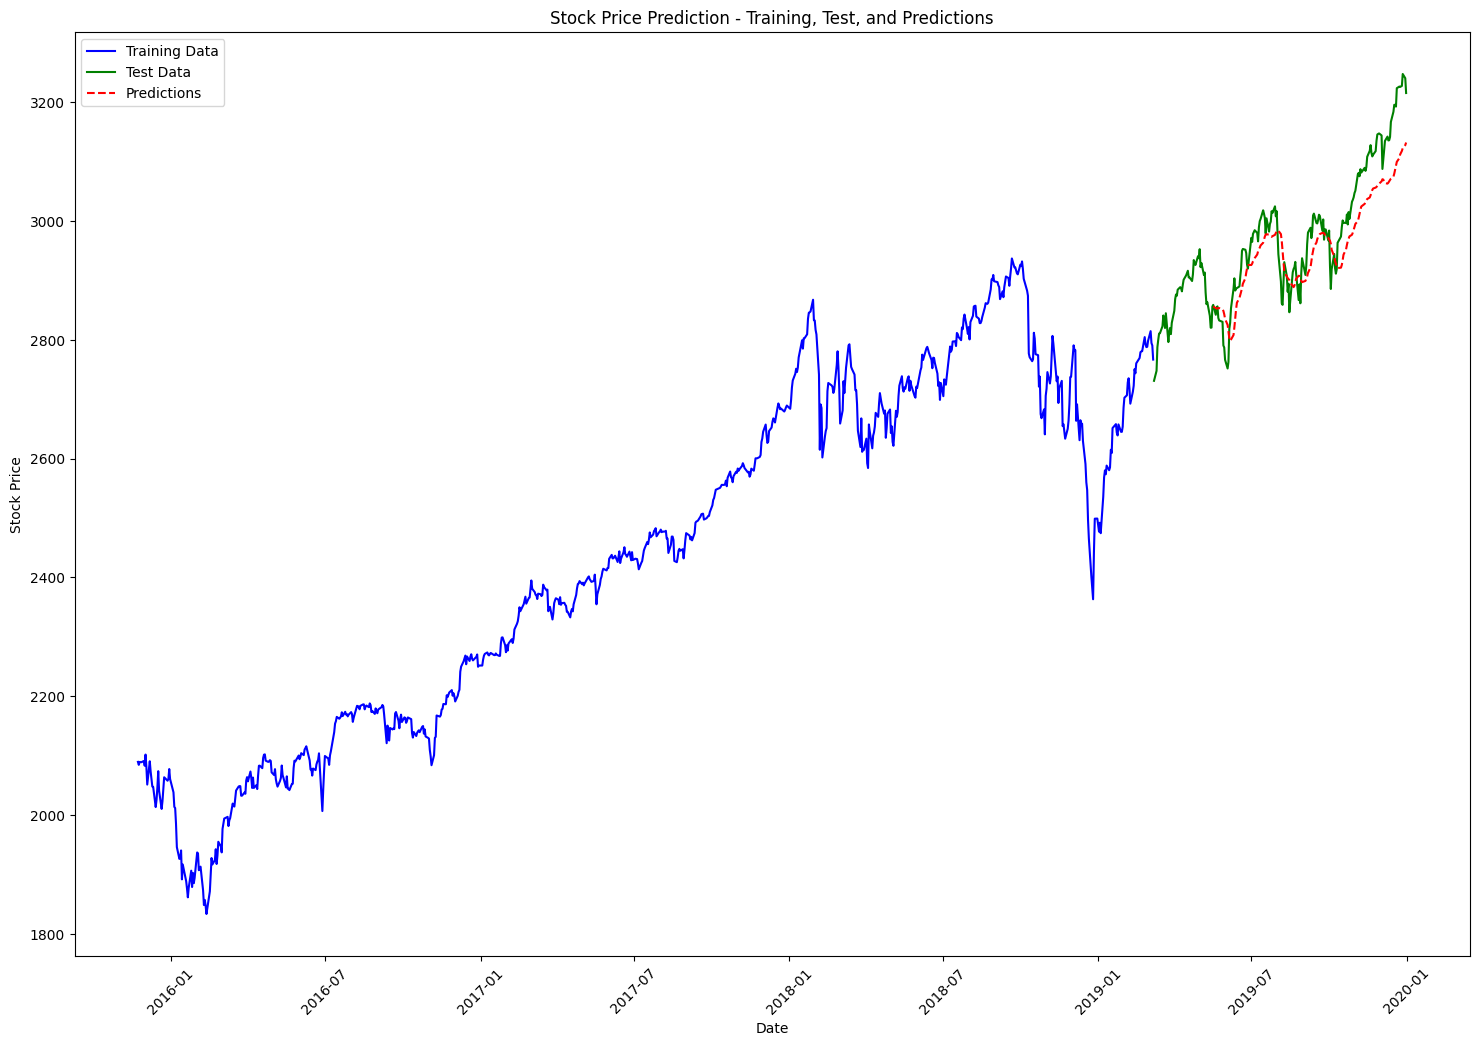

In [39]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.plot(train_df.index, train_df.Stock, label="Training Data", color="blue")
ax.plot(test_df.index, test_df.Stock, label="Test Data", color="green")

# Align predictions with the test_data index.
# Note: We're assuming here that y_RNN_O is the scaled back predictions to their original values.
prediction_dates = test_df.index[50:]  # This aligns the predictions with their corresponding dates.
ax.plot(prediction_dates, y_GRU_O, label="Predictions", color="red", linestyle="--")

ax.legend()
ax.set_title("Stock Price Prediction - Training, Test, and Predictions")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
plt.xticks(rotation=45)
plt.show()


(156,)
(156, 1)


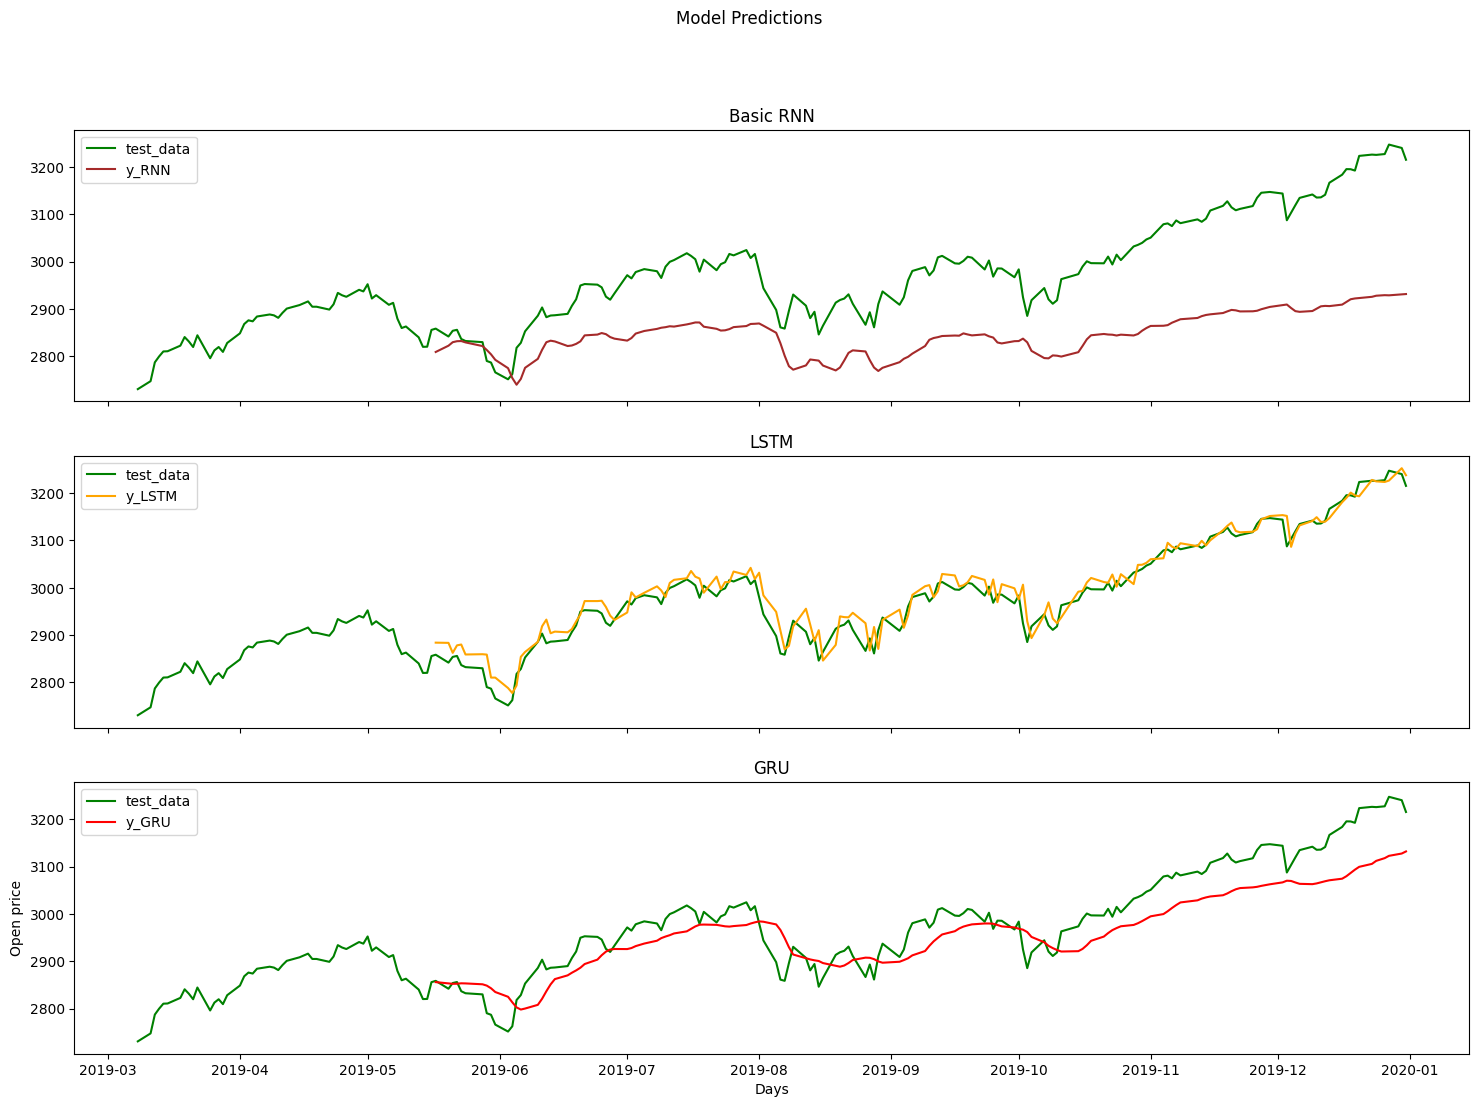

In [35]:
print(test_df.index[50:].shape)
print(y_RNN.shape)

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
#axs[0].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[0].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[0].plot(test_df.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
#axs[1].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[1].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[1].plot(test_df.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
#axs[2].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[2].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[2].plot(test_df.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [42]:
# Assuming y_LSTM_O and y_GRU_O are your inverse scaled predictions from the LSTM and GRU models respectively

# Calculate performance metrics for LSTM
mae_lstm = mean_absolute_error(test_df.Stock[50:], y_LSTM_O)
mse_lstm = mean_squared_error(test_df.Stock[50:], y_LSTM_O)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = np.mean(np.abs((test_df.Stock[50:] - y_LSTM_O) / test_df.Stock[50:])) * 100
r2_lstm = r2_score(test_df.Stock[50:], y_LSTM_O)

# Calculate performance metrics for GRU
mae_gru = mean_absolute_error(test_df.Stock[50:], y_GRU_O)
mse_gru = mean_squared_error(test_df.Stock[50:], y_GRU_O)
rmse_gru = np.sqrt(mse_gru)
mape_gru = np.mean(np.abs((test_df.Stock[50:] - y_GRU_O) / test_df.Stock[50:])) * 100
r2_gru = r2_score(test_df.Stock[50:], y_GRU_O)

# Print the metrics in a table format
metrics_format = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}"
print(metrics_format.format("Model", "MAE", "MSE", "RMSE", "MAPE(%)", "R-squared"))
print(metrics_format.format("RNN", f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}", f"{mape:.2f}", f"{r2:.2f}"))
print(metrics_format.format("LSTM", f"{mae_lstm:.2f}", f"{mse_lstm:.2f}", f"{rmse_lstm:.2f}", f"{mape_lstm:.2f}", f"{r2_lstm:.2f}"))
print(metrics_format.format("GRU", f"{mae_gru:.2f}", f"{mse_gru:.2f}", f"{rmse_gru:.2f}", f"{mape_gru:.2f}", f"{r2_gru:.2f}"))


Model      MAE        MSE        RMSE       MAPE(%)    R-squared 
RNN        146.57     26528.23   162.87     4.83       -1.24     
LSTM       19.48      646.26     25.42      0.66       0.95      
GRU        46.58      3039.15    55.13      1.54       0.74      


### Post (complete by Sunday 18/02/24)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 21/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value.

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday 25/02/24)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

In [ ]:
embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


In [ ]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

In [ ]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 25/02/24)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.